<a href="https://colab.research.google.com/github/frag30041997/jupyter-one/blob/master/cours_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns; sns.set()

In [ ]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
#nombre de variables differentes dans la colonne
iris['species'].nunique()
#nom des var differente de la colonne
iris.species.unique() #les deux syntaxe des commandes se valent

array(['setosa', 'versicolor', 'virginica'], dtype=object)

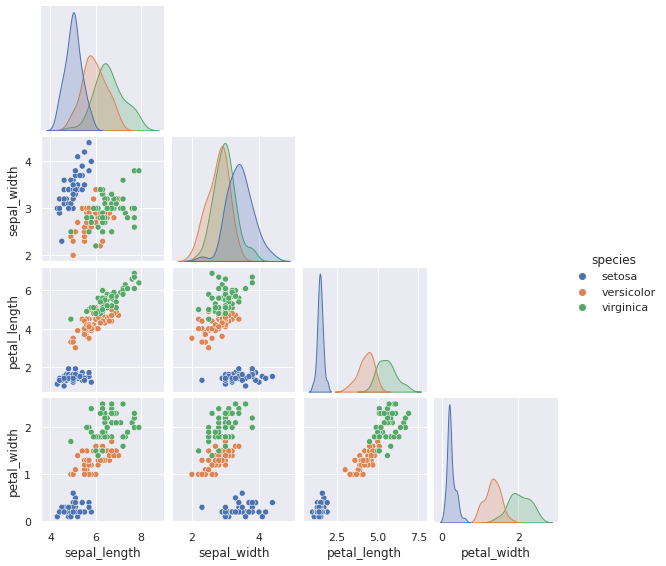

In [ ]:
sns.pairplot(iris,hue='species',diag_kind='kde',height=2,corner=True) #hue = cibles diag_king = format de données 
#diag_kind = 'kde' (= histogramme ++)                     corner = true (=enleve les versions ou les abs et ordonnées sont inversés (=plus clair))

#separer features (=colonnes) du target

In [ ]:
#target
y = iris.species.astype('category').cat.codes
vocabulaire = iris.species.astype('category').cat.categories
vocabulaire

Index(['setosa', 'versicolor', 'virginica'], dtype='object')

In [ ]:
vocabulaire = iris.species.astype('category').cat.categories
#1/ classe vers nombre
#2/nombre vers classe
classe2index = { v:i for i, v in enumerate(vocabulaire.tolist())}
index2classe = { i:v for i, v in enumerate(vocabulaire.tolist())}

In [ ]:
classe2index

{'setosa': 0, 'versicolor': 1, 'virginica': 2}

In [ ]:
index2classe

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [96]:
#isoler features
#features,cible
#target
y = iris.species.astype('category').cat.codes
vocabulaire = iris.species.astype('category').cat.categories

x = iris.drop('species',axis='columns')
x.shape,y.shape

((150, 4), (150,))

#entrainer un model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN

knn = KNN(n_neighbors=3)

print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
knn.predict(x)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int8)

In [ ]:
#creer mesure de performances
def accuracy(preds, target):
  M = target.shape[0] #nb d'ex
  total_correct = (preds == target).sum()
  accuracy = (total_correct/M)
  return accuracy

In [ ]:
predictions = knn.predict(x)

In [ ]:
(predictions==y).sum()

144

In [ ]:
accuracy(predictions,y)

0.96

#tracer les frontieres

In [ ]:
from sklearn.datasets import make_moons

In [ ]:
import pandas as pd, numpy as np

In [ ]:
x,y = make_moons(random_state=0,noise=0.3)
x.shape,y.shape

((100, 2), (100,))

In [ ]:
df_moon = pd.DataFrame({'x0' : x[:,0], 'x1' : x[:,1], 'y' : y})

In [ ]:
df_moon.head()

,x0,x1,y
0,0.031595,0.986988,0
1,2.115098,-0.046244,1
2,0.882490,-0.075756,0
3,-0.055144,-0.037332,1
4,0.829545,-0.539321,1


In [ ]:
x[:,1] #premiere colonne

array([ 0.98698776, -0.04624397, -0.07575606, -0.03733246, -0.53932149,
        0.66208353,  0.33744136, -0.75307471,  0.39287336,  0.36069454,
        0.61420539, -0.3091496 , -0.74636376,  1.19793017,  0.54703192,
        1.11971633,  1.23315697,  0.82373935,  0.77876034,  0.55290238,
        0.6572361 , -0.1951543 ,  0.75287685, -0.45892444, -0.12944211,
       -0.3829632 ,  0.31252842, -0.02291747,  0.17247329, -0.10517023,
       -0.14575067, -1.03570207, -0.01107874, -0.32478101,  0.56648467,
        1.00215131,  1.00062892,  0.24717743,  0.19317272, -0.62574566,
       -0.04515581, -0.39369468,  0.0465662 ,  0.13666025,  0.37782458,
        1.38517841,  1.57189931,  0.72886601,  0.16190215,  0.15375803,
       -0.00705701, -0.23488747,  0.44721658,  0.67869095,  0.28668667,
        0.16085107,  0.98300993,  0.25160139,  1.32217183,  0.56178326,
        0.75444825,  0.99291317, -0.09767143, -0.3796549 , -0.79994161,
       -0.36841845,  0.96158657, -0.62984517,  0.57661371, -0.69

In [ ]:
x[1,:] #premiere ligne

array([ 2.11509784, -0.04624397])

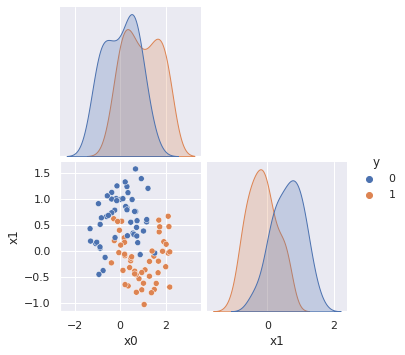

In [ ]:
sns.pairplot(df_moon, hue='y', corner=True, diag_kind='kde')

In [ ]:
#1/ creer le maillage
#determiner la plage de valeurs
def plage_de_valeur(df, col, b=0.2):
  #b = bordure
  min = df[col].min()-b
  max = df[col].max()+b
  return (min,max)


In [ ]:
#creer les axes
x0_range = np.arange(*plage_de_valeur(df_moon,'x0'),0.1)
x1_range = np.arange(*plage_de_valeur(df_moon,'x1'),0.1)

In [ ]:
#creer le maillage
x0_mesh,x1_mesh = np.meshgrid(x0_range,x1_range)
x0_mesh.shape,x1_mesh.shape

((31, 39), (31, 39))

In [ ]:
#demeler le maillage

x0_mesh, x1_mesh = x0_mesh.ravel(), x1_mesh.ravel()

x0_mesh.shape , x1_mesh.shape

((1209,), (1209,))

In [ ]:
mesh_df = pd.DataFrame({'x0':x0_mesh,'x1':x1_mesh})

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


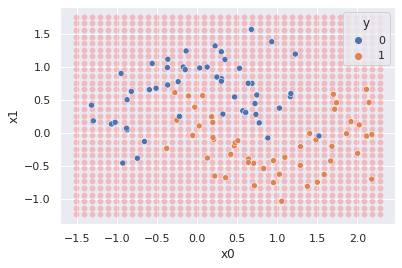

In [ ]:
sns.scatterplot(x0_mesh,x1_mesh,color='red',alpha=0.2)
sns.scatterplot(df_moon['x0'],df_moon['x1'],hue=df_moon['y'])

#avec k = 1

In [ ]:
knn = KNN(n_neighbors=1)
knn.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
mesh_predictions = knn.predict(mesh_df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


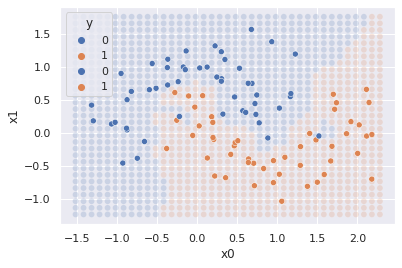

In [ ]:
sns.scatterplot(x0_mesh,x1_mesh,hue=mesh_predictions,alpha=0.2)
sns.scatterplot(df_moon['x0'],df_moon['x1'],hue=df_moon['y'])

# En mode fonction

In [ ]:
def plot_knn_decision(k=1):
  knn = KNN(n_neighbors=k)
  knn.fit(x,y)
  mesh_predictions = knn.predict(mesh_df)
  print('k = ',k)
  sns.scatterplot(x0_mesh,x1_mesh,hue=mesh_predictions,alpha=0.2)
  sns.scatterplot(df_moon['x0'],df_moon['x1'],hue=df_moon['y'])

k =  1


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


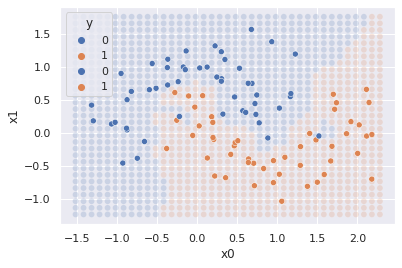

In [ ]:
plot_knn_decision(k=1)

#Mesurer les perfs